> 重新开始学习 另外一本书  Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow 2020-5-23 15:00:19，上一本书很多内容没有讲清楚。

- 总共有10章，一个周能学一章就不错。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.1.0'

In [3]:
keras.__version__

'2.2.4-tf'

# introduction

## The perception
- TLU: Threshold logic unit / step funcion after a linear regression 
- A Perceptron is simply composed of a single layer of TLUs
- serious weaknesses of Perceptrons—in particular, the fact that they are incapable of solving some trivial problems (e.g., the Exclusive OR (XOR) classification problem;
- MLP: Multilayer Perception

## The Multilayer Perceptron and Backpropagation

- For many years researchers struggled to find a way to train MLPs,
- backpropagation algorithm is able to compute the gradient of the network’s error with regard to every single model parameter.
- It is important to initialize all the hidden layers’ connection weights randomly
- activation function:
    - tanh: hyperbolic tangent/ which often helps speed up convergence/ (-1,1) 
    - RelU: rectified linear unit, defaults/ fast  

## Regression MLPs
- multivariate regression

## Classification MLPs
- cross-entropy loss (also called the log loss, see Chapter 4) is generally a good choice

### Activation Function

- The softmax function (introduced in Chapter 4) will ensure that all the estimated probabilities are between 0 and 1 and that they add up to 1 (which is required if the classes are exclusive).

## Implementing MLPs with Keras
- create
- compile
- fit
- evaluate
- predict


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
type(X_train_full)

numpy.ndarray

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
# Wrong, can't save 3D array
# np.savetxt(r'./keras_datasets/fm_X_train_full.csv',X_train_full)

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

In [12]:
print(X_train_full.shape, y_train_full.shape)

(60000, 28, 28) (60000,)


In [13]:
print(y_train[:10])

[4 0 7 9 9 9 4 4 3 4]


### Creating the model using the Sequential API 

- Sequential Model: a single stack of layers
- model.summary
- model.layers
- layers.get_weights

In [14]:
model = keras.models.Sequential()

# Flatten layer: preprocessing, the shape of instance rather than batch
# it reshape the input inot x.reshape(-1,1)
model.add(keras.layers.Flatten(input_shape=[28, 28]))


# Dense Layer: Notice that the Dense layer initialized the connection weights randomly (which is
# needed to break symmetry, as we discussed earlier),
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))

# output layer
# For multiclass use softmax, 
# For binary cldassification ,use sigmoid and binary_crossentropy
model.add(keras.layers.Dense(10, activation="softmax"))



# Another Organization
# ```
# model = keras.models.Sequential([
# keras.layers.Flatten(input_shape=[28, 28]),
# keras.layers.Dense(300, activation="relu"),
# keras.layers.Dense(100, activation="relu"),
# keras.layers.Dense(10, activation="softmax")
# ])

# ```

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.layers

In [17]:
hid1 = model.layers[1]

In [18]:
hid1.name

'dense'

In [19]:
# After a model is created, you must call its compile() method to specify the loss function
# and the optimizer to use.

# kwpara:
# loss_wight: can define different loss_weight to different output.
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [20]:
# kwpara of fit:
# class_weight: if the train dataset is skewed
# sample_weight: if some sample is labeled by expert

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 100us/sample - loss: 0.7222 - accuracy: 0.7610 - val_loss: 0.5305 - val_accuracy: 0.8130
Epoch 2/30
55000/55000 [==============================] - 4s 65us/sample - loss: 0.4885 - accuracy: 0.8298 - val_loss: 0.4410 - val_accuracy: 0.8526
Epoch 3/30
55000/55000 [==============================] - 4s 64us/sample - loss: 0.4429 - accuracy: 0.8451 - val_loss: 0.4217 - val_accuracy: 0.8602
Epoch 4/30
55000/55000 [==============================] - 5s 94us/sample - loss: 0.4154 - accuracy: 0.8547 - val_loss: 0.4180 - val_accuracy: 0.8544
Epoch 5/30
55000/55000 [==============================] - 5s 86us/sample - loss: 0.3975 - accuracy: 0.8599 - val_loss: 0.3887 - val_accuracy: 0.8672
Epoch 6/30
55000/55000 [==============================] - 4s 73us/sample - loss: 0.3792 - accuracy: 0.8672 - val_loss: 0.3709 - val_accuracy: 0.8724
Epoch 7/30
55000/55000 [==============================] 

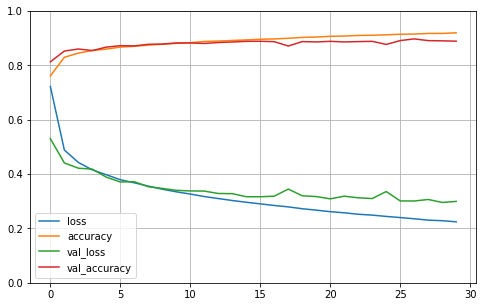

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [22]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.722205,0.761018,0.530473,0.8130
1,0.488496,0.829836,0.440970,0.8526
2,0.442873,0.845055,0.421688,0.8602
3,0.415361,0.854727,0.418026,0.8544
4,0.397510,0.859855,0.388674,0.8672


In [23]:
history_df.shape

(30, 4)

In [24]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 58us/sample - loss: 57.7550 - accuracy: 0.8553


[57.75500184459686, 0.8553]

### Building a Regression MLP Using the Sequential API 

- The main differences are the fact that the output layer has a single neuron (since we only want to predict a single value) and uses no activation function

In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Building Complex Models Using the Functional API
- One example of a nonsequential neural network is a Wide & Deep neural network.
- call the Dense as a function
```
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)  #here like a function
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])
```

### Using the Subclassing API to Build Dynamic Models
- unless you really need
that extra flexibility, you should probably stick to the Sequential API or the Functional
API.

### Saving and Restoring a Model

```
model = keras.models.Sequential([...]) # or keras.Model([...])
model.compile([...])
model.fit([...])
model.save("my_keras_model.h5")
model = keras.models.load_model("my_keras_model.h5")

```

### Using Callbacks

```
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

```

### Using TensorBoard for Visualization

- you must modify your program so that it outputs the data you want to visualize to special binary log files called event file

In [26]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [27]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 80us/sample - loss: 0.2197 - accuracy: 0.9217 - val_loss: 0.3167 - val_accuracy: 0.8842
Epoch 2/30
55000/55000 [==============================] - 4s 79us/sample - loss: 0.2165 - accuracy: 0.9224 - val_loss: 0.2971 - val_accuracy: 0.8946
Epoch 3/30
55000/55000 [==============================] - 4s 74us/sample - loss: 0.2140 - accuracy: 0.9232 - val_loss: 0.3026 - val_accuracy: 0.8918
Epoch 4/30
55000/55000 [==============================] - 4s 76us/sample - loss: 0.2094 - accuracy: 0.9255 - val_loss: 0.2988 - val_accuracy: 0.8954
Epoch 5/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.2065 - accuracy: 0.9256 - val_loss: 0.2954 - val_accuracy: 0.8948
Epoch 6/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.2032 - accuracy: 0.9267 - val_loss: 0.2919 - val_accuracy: 0.8952
Epoch 7/30
55000/55000 [==============================] -

### Fine-Tuning Neural Network Hyperparameters

#### Number of Neurons per Hidden Layer
- it used to be common to size them to form a pyramid, with fewer and fewer neurons at each layer